# Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset
df = pd.read_csv('tested.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df.shape

(418, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [10]:
df['Cabin'].value_counts()

B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: Cabin, Length: 76, dtype: int64

# Data Preprocessing

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

There're nulls in Age, Fare and Cabin attributes

Filling Fare

Filling nulls with the mean fare of their Pclass:

In [12]:
df[df.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [13]:
fare_mean_c3 = df.Fare[df.Pclass == 3].mean()
df['Fare'].fillna(value=fare_mean_c3, inplace=True)


Filling Age

Fill the age, we can check the titles (Miss, Mr, Mrs, Master, Dr) and take the age average of each one, then fill the age according to the title. Yes, Master is one of the titles used in Titanic, is used for boys and young men, mostly by english people.

Mean age of Miss. title 22.0
Mean age of Mrs. title 39.0
Mean age of Mr. title 34.0
Mean age of Master. title 7.0


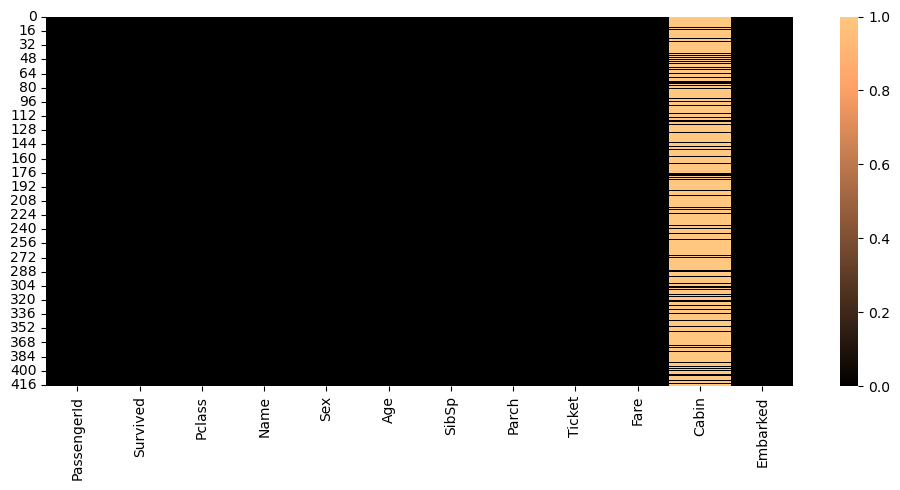

In [14]:
mean_age_miss = df[df["Name"].str.contains('Miss.', na=False)]['Age'].mean().round()
mean_age_mrs = df[df["Name"].str.contains('Mrs.', na=False)]['Age'].mean().round()
mean_age_mr = df[df["Name"].str.contains('Mr.', na=False)]['Age'].mean().round()
mean_age_master = df[df["Name"].str.contains('Master.', na=False)]['Age'].mean().round()

print('Mean age of Miss. title {}'.format(mean_age_miss))
print('Mean age of Mrs. title {}'.format(mean_age_mrs))
print('Mean age of Mr. title {}'.format(mean_age_mr))
print('Mean age of Master. title {}'.format(mean_age_master))

def fill_age(name_age):
    
    name = name_age[0]
    age = name_age[1]
    
    if pd.isnull(age):
        if 'Mr.' in name:
            return mean_age_mr
        if 'Mrs.' in name:
            return mean_age_mrs
        if 'Miss.' in name:
            return mean_age_miss
        if 'Master.' in name:
            return mean_age_master
        if 'Dr.' in name:
            return mean_age_master
        if 'Ms.' in name:
            return mean_age_miss
    else:
        return age

df['Age'] = df[['Name', 'Age']].apply(fill_age,axis=1)

fig, (ax1) = plt.subplots(1, 1, figsize=(10,5))
sns.heatmap(df.isnull(),cmap='copper', ax=ax1)
plt.tight_layout()


And for Cabin attribute which has alot of missings we dropped it

In [15]:
df.drop(['Cabin'], axis=1, inplace=True)

# Drop the irrelevent columns

In [16]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Categorical Values

In [17]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          79
SibSp         7
Parch         8
Fare        170
Embarked      3
dtype: int64

In [18]:
df_cat = df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Survived']]
df_cat.head()

,Pclass,Sex,SibSp,Parch,Embarked,Survived
0,3,male,0,0,Q,0
1,3,female,1,0,S,1
2,2,male,0,0,Q,0
3,3,male,0,0,S,0
4,3,female,1,1,S,1


In [19]:
categories = {"female": 1, "male": 0}
df['Sex']= df['Sex'].map(categories)

prepared_df = pd.concat([df, pd.get_dummies(df['Embarked'],drop_first=True)], axis=1) 

prepared_df.drop(['Embarked'], axis=1, inplace=True)

In [20]:
prepared_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,0,34.5,0,0,7.8292,1,0
1,1,3,1,47.0,1,0,7.0000,0,1
2,0,2,0,62.0,0,0,9.6875,1,0
3,0,3,0,27.0,0,0,8.6625,0,1
4,1,3,1,22.0,1,1,12.2875,0,1


In [21]:
prepared_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int64  
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Q         418 non-null    uint8  
 8   S         418 non-null    uint8  
dtypes: float64(2), int64(5), uint8(2)
memory usage: 23.8 KB


# Correlation

<Axes: >

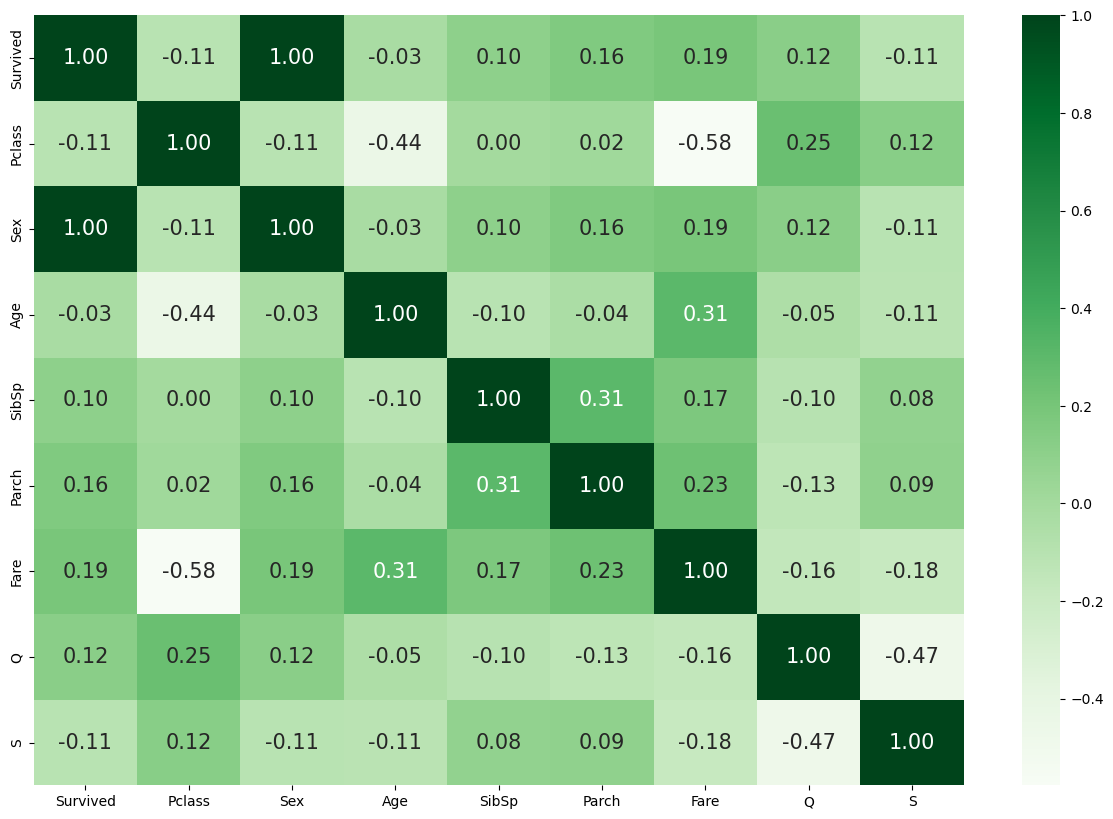

In [22]:
corr = prepared_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, cbar=True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Greens')

It's noticeable that 'Sex_male' has a 100% correlation with the target attribute, So we have to drop it as it's going to overfit our ML model later.

In [23]:
prepared_df.drop(['Sex'], axis=1, inplace=True)

# Data Distribution

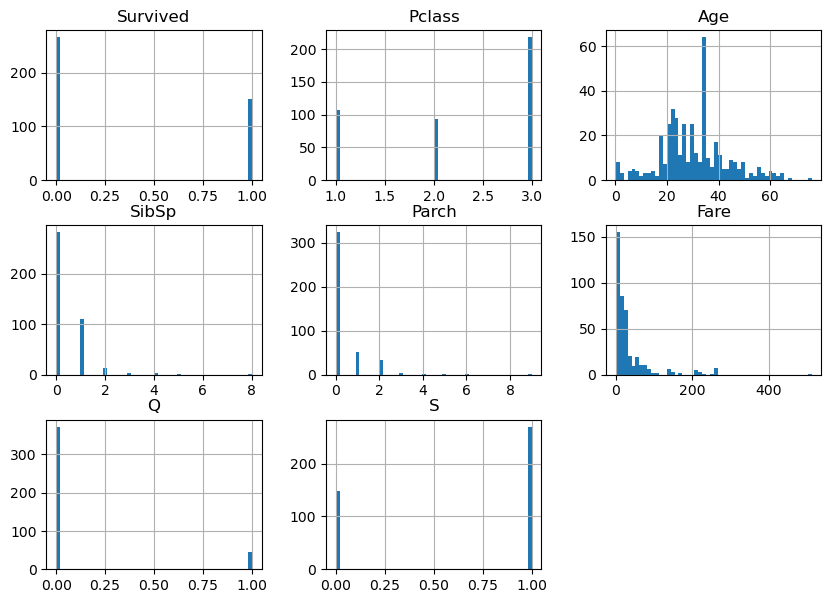

In [24]:
prepared_df.hist(bins=50, figsize=(10,7))
plt.show()

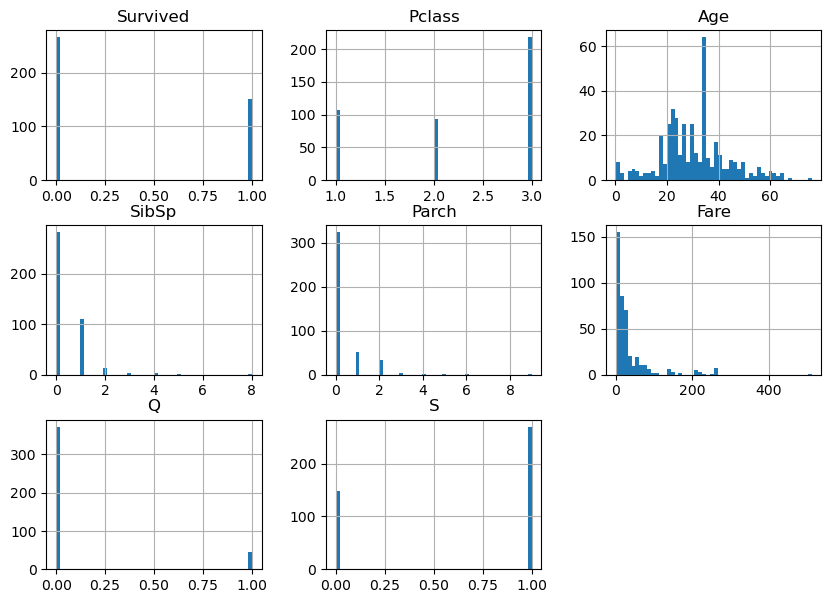

In [25]:
prepared_df.hist(bins=50, figsize=(10,7))
plt.show()

Skewness
the skewness value should be within the range of -1 to 1 for a normal distribution, any major changes from this value may indicate the presence of outliers.

In [26]:
print('skewness value of Age: ',prepared_df['Age'].skew())
print('skewness value of Fare: ',prepared_df['Fare'].skew())

skewness value of Age:  0.3638566298420751
skewness value of Fare:  3.6921401019248568


from the code above, the ‘Fare’ skewness value of 3.69 shows the variable has been rightly skewed, indicating the presence of outliers.



Flooring And Capping
in this quantile-based technique, we will do the flooring(e.g 25th percentile) for the lower values and capping(e.g for the 75th percentile) for the higher values. These percentile values will be used for the quantile-based flooring and capping.

the code below drops the outliers by removing all the values that are below the 25th percentile and above the 75th percentile of the ‘Fare’ variable.

In [27]:
Q1 = prepared_df['Fare'].quantile(0.25)
Q3 = prepared_df['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
prepared_df['Fare']=np.where(prepared_df['Fare']>upper_whisker,upper_whisker,np.where(prepared_df['Fare']<lower_whisker,lower_whisker,prepared_df['Fare']))

# Feature Engineering

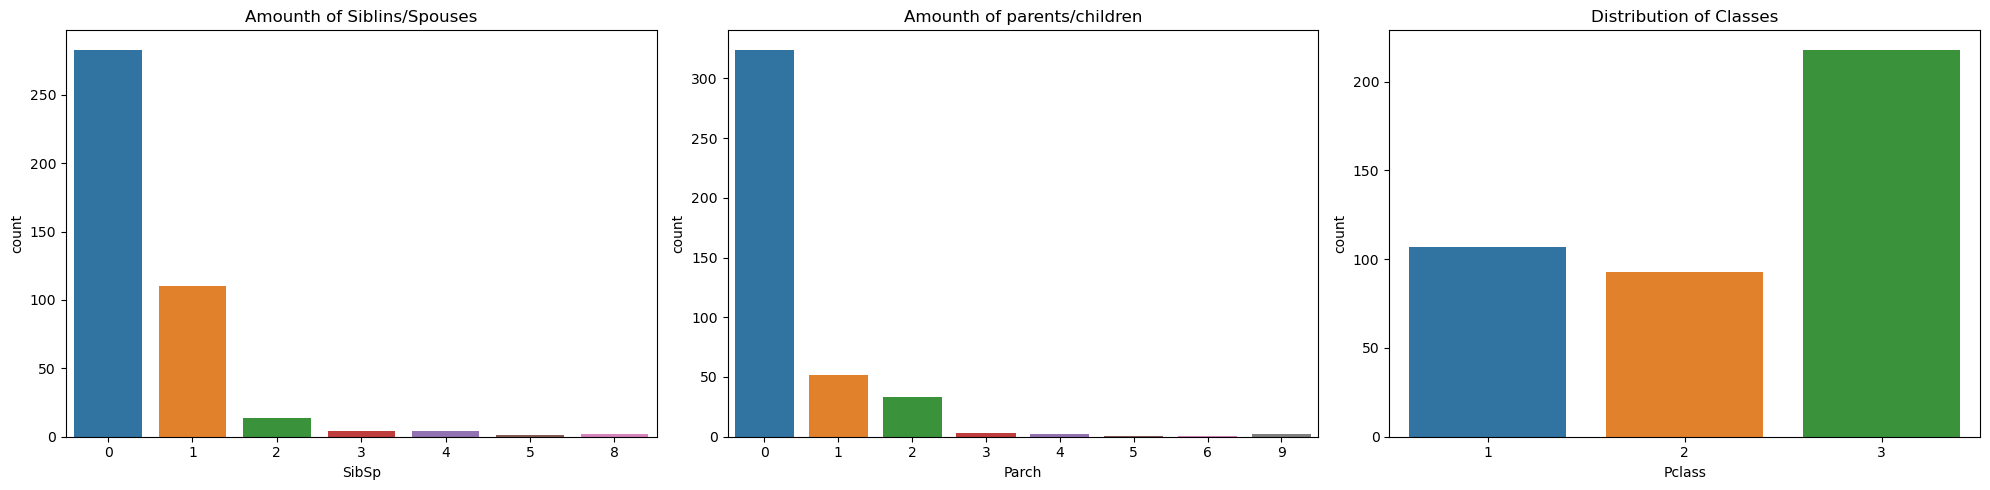

In [28]:
fig, axx = plt.subplots(1, 3, figsize=(20,5))
axx[0].set_title('Amounth of Siblins/Spouses')
sns.countplot(x='SibSp', data=prepared_df, ax=axx[0])
axx[1].set_title('Amounth of parents/children')
sns.countplot(x='Parch', data=prepared_df, ax=axx[1])
axx[2].set_title('Distribution of Classes')
sns.countplot(x='Pclass', data=prepared_df, ax=axx[2])
plt.tight_layout()

In [29]:
def create_alone_feature(SibSp_Parch):
    if (SibSp_Parch[0]+SibSp_Parch[1])==0:
        return 1
    else:
        return 0
 
prepared_df['Alone'] = prepared_df[['SibSp','Parch']].apply(create_alone_feature, axis=1)
prepared_df['Familiars'] = 1 + prepared_df['SibSp'] + prepared_df['Parch']

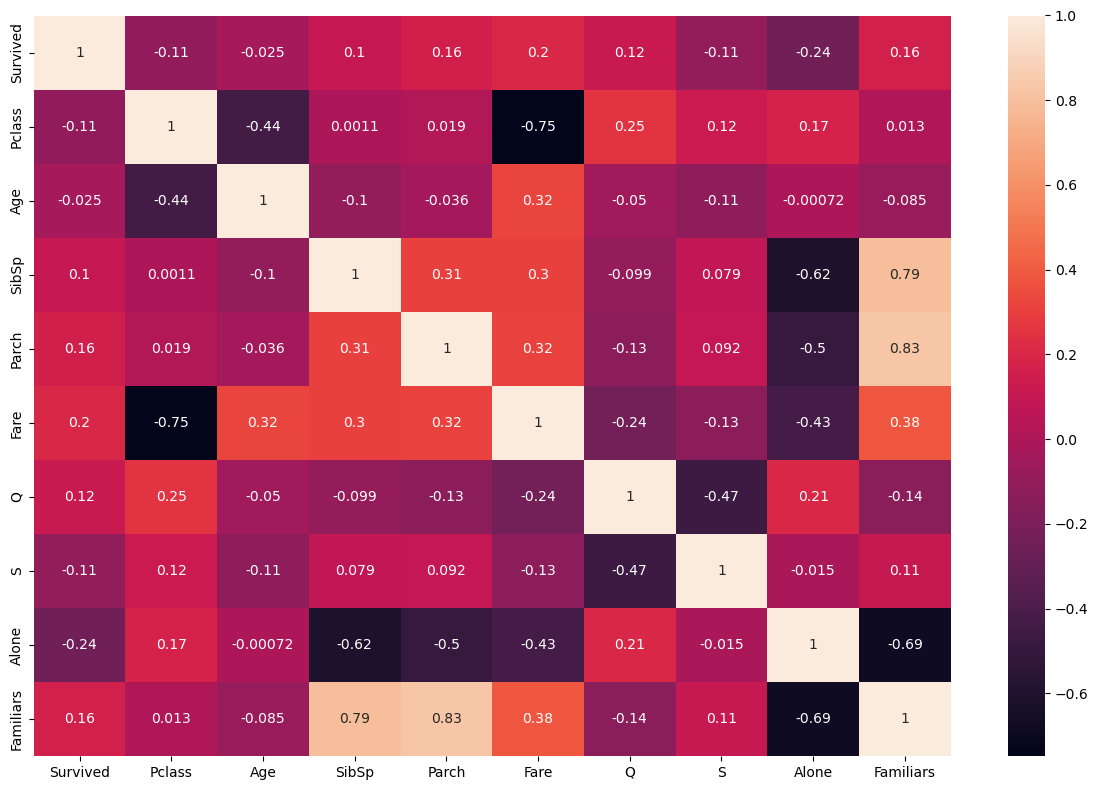

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(prepared_df.corr(), annot=True)
plt.tight_layout()

# Split Data

In [31]:
X = prepared_df.drop(['Survived'], axis=1)
y = prepared_df['Survived']

# Normalize Data

In [32]:
from sklearn.preprocessing import MinMaxScaler
mns = MinMaxScaler()
X = pd.DataFrame(mns.fit_transform(X), columns=X.columns)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

# Model Training

Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=2)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=2)

In [36]:
print('Training score: ', round(clf.score(X_train, y_train),3))
print('Testing score: ', round(clf.score(X_test, y_test),3))

Training score:  0.839
Testing score:  0.73


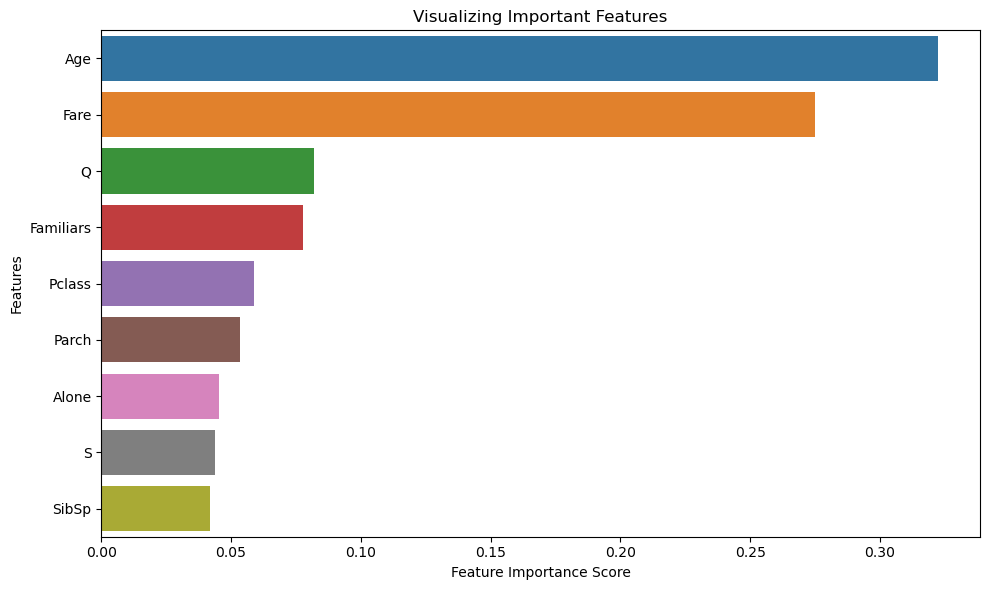

In [37]:
feature_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)


plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

In [38]:
X_2 = X.drop(['SibSp', 'Alone', 'S', 'Q'], axis=1)

from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2,y, test_size=0.30, random_state=42)

clf.fit(X_train_2, y_train_2)

print('Training score: ', round(clf.score(X_train_2, y_train_2),3))
print('Testing score: ', round(clf.score(X_test_2, y_test_2),3))

Training score:  0.825
Testing score:  0.73


# SVC

In [39]:
from sklearn.svm import SVC
clf2 = SVC(gamma='auto')
clf2.fit(X_train, y_train)

print('Training score: ', round(clf2.score(X_train, y_train),3))
print('Testing score: ', round(clf2.score(X_test, y_test),3))

Training score:  0.644
Testing score:  0.635


# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)

print('Training score: ', round(lr.score(X_train, y_train),3))
print('Testing score: ', round(lr.score(X_test, y_test),3))

Training score:  0.668
Testing score:  0.651


# GaussianNB

In [41]:
from sklearn.naive_bayes import GaussianNB
G = GaussianNB().fit(X_train, y_train)

print('Training score: ', round(G.score(X_train, y_train),3))
print('Testing score: ', round(G.score(X_test, y_test),3))

Training score:  0.658
Testing score:  0.619
